In [1]:
%pip install -r requirements.txt --upgrade
%pip install mido

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


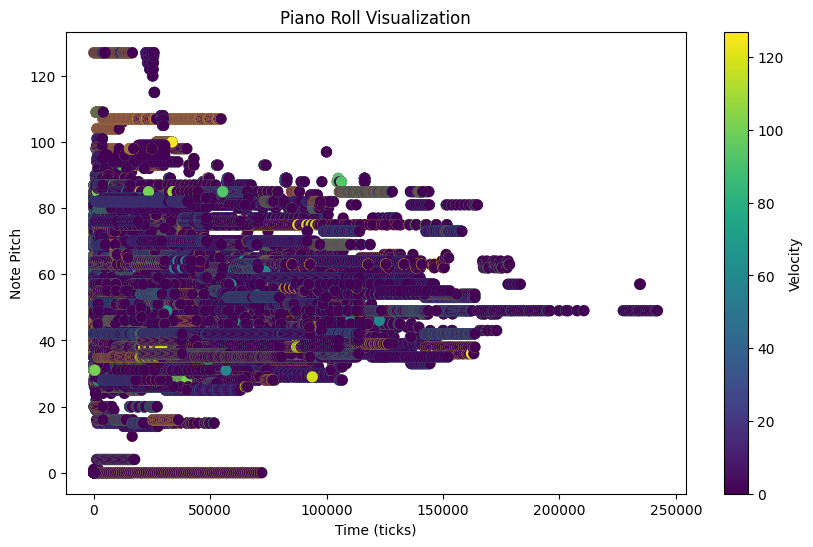

In [2]:
import mido
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Load midi file
# mid = mido.MidiFile('output/model_output.mid')
# mid = mido.MidiFile('drums/1.mid')

# Lists to store data
times = []
pitches = []
velocities = []
event_types = []

for path in Path('drums/').rglob('*.mid'):
    mid = mido.MidiFile(path)
    time_so_far = 0
    for track in mid.tracks:
        for msg in track:
            time_so_far += msg.time
            if msg.type == 'note_on':
                times.append(time_so_far)
                pitches.append(msg.note)
                velocities.append(msg.velocity)
                event_types.append('note_on')
            elif msg.type == 'note_off':
                times.append(time_so_far)
                pitches.append(msg.note)
                velocities.append(0)  # Velocity is 0 for note off
                event_types.append('note_off')

# Create a piano roll plot
plt.figure(figsize=(10, 6))
plt.scatter(times, pitches, c=velocities, cmap='viridis', s=50)
plt.xlabel('Time (ticks)')
plt.ylabel('Note Pitch')
plt.title('Piano Roll Visualization')
plt.colorbar(label='Velocity')
plt.show()

0
127
2504100


<Figure size 1000x600 with 0 Axes>

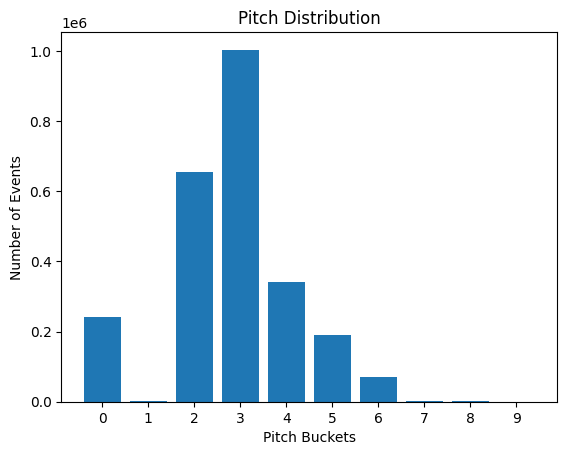

In [3]:
print(min(pitches))
print(max(pitches))

print(len(pitches))

bins = 10
# p = map(, )
# p = np.array(list(p))
# x = np.array([1, 2, 3, 4, 5])
x = np.array(pitches)
f = lambda x: x / (min(pitches)+.000000001) / bins
p = f(x)

counts, _ = np.histogram(p, bins=bins)

# Create a piano roll plot
plt.figure(figsize=(10, 6))
# plt.scatter(times, pitches, c=velocities, cmap='viridis', s=50)
# plt.plot(pitches)
# plt.plot(velocities)

fig, ax = plt.subplots()
x_labels = [f"{i}" for i in range(bins)]
ax.bar(x_labels, counts)
# plt.hist(p)

plt.xlabel('Pitch Buckets')
plt.ylabel('Number of Events')
plt.title('Pitch Distribution')
# plt.colorbar(label='Velocity')
plt.show()
